In [37]:
import numpy as np
from collections import deque
np.set_printoptions(linewidth=160)
matrix = np.loadtxt("matrix4.txt", dtype='str')
print(matrix)

[['1' '1' '1' '1' '1']
 ['1' '0' '1' '0' '1']
 ['1' 'P' '1' 'G' '1']
 ['1' '0' '1' '0' '1']
 ['1' '1' '1' '1' '1']]


In [38]:
temp_matrix = matrix
matrix = np.where(matrix=='P', 2, matrix)
matrix = np.where(matrix=='G', 3, matrix)
matrix = matrix.astype(float)

In [39]:
result = np.where(matrix == 2)
start_x_pos = result[0][0]
start_y_pos = result[1][0]

result = np.where(matrix == 3)
target_x_pos = result[0][0]
target_y_pos = result[1][0]

In [40]:
rows, columns = matrix.shape

In [41]:
def bfs_route():


  queue_x_pos = deque()
  queue_y_pos = deque()  


  queue_x_pos.append(start_x_pos)
  queue_y_pos.append(start_y_pos)

  




  visit_matrix = temp_matrix.copy()

  parent_matrix = temp_matrix.copy()
  parent_matrix = parent_matrix.astype(object)

  print(visit_matrix, "\n")

  visit_matrix[start_x_pos][start_y_pos] = True
  parent_matrix[start_x_pos][start_y_pos] = (-1, -1)
  #visit_matrix = np.where(visit_matrix=='1', False, visit_matrix)

  #print(visit_matrix)

  find_target = False

  print("Start...")
  while len(queue_x_pos) > 0:

      if find_target:
          break


      print("X QUEUE:", queue_x_pos)
      print("Y QUEUE:", queue_y_pos)

      x_pos = queue_x_pos.popleft()
      y_pos = queue_y_pos.popleft()


      #print("Pop from queue ", x_pos, y_pos)

      adjacent = [[0, 1], [1, 0], [-1, 0], [0, -1]]

      for i in range(len(adjacent)):
        x_pos_adj = x_pos + adjacent[i][0]
        y_pos_adj = y_pos + adjacent[i][1]


        visit_matrix[x_pos][y_pos] = True


        if x_pos_adj == rows:
          x_pos_adj -= rows
        elif x_pos_adj == -1:
          x_pos_adj += rows

        if y_pos_adj == columns:
          y_pos_adj -= columns
        elif y_pos_adj == -1:
          y_pos_adj += columns

        #print(x_pos_adj, y_pos_adj)


        if visit_matrix[x_pos_adj][y_pos_adj] == 'T':
          continue
        if visit_matrix[x_pos_adj][y_pos_adj] == '1' :
          continue

        # node = Node(x_pos_adj, y_pos_adj)
        # node.setParent(x_pos, y_pos)
        # genealogy = np.append(genealogy, [node],axis = 0) 

        queue_x_pos.append(x_pos_adj)
        queue_y_pos.append(y_pos_adj)


        parent_matrix[x_pos_adj][y_pos_adj] = (x_pos, y_pos)



        if visit_matrix[x_pos_adj][y_pos_adj] == 'G':
          visit_matrix[x_pos_adj][y_pos_adj] = 'D'
          print("Finish...\n", visit_matrix, "\n")
          find_target = True
          break

        visit_matrix[x_pos_adj][y_pos_adj] = True


      print(visit_matrix, "\n")
    
      #visit_matrix[x_pos][y_pos] = True
      




  #     print(queue_x_pos)
  #     print(queue_y_pos)
  # print(visit_matrix)
  # print("Hello", genealogy[-1].getParent())

  # node = genealogy[-1]
  # print("hihihi", node)



  # while node.getParent() != (-1, -1):
  #   node = node(node.getParent()[0], node.getParent()[1])
  #   print(node)
  # print(node)

  #print(parent_matrix)

  x = target_x_pos
  y = target_y_pos

  path = []
  while parent_matrix[x][y] != (-1, -1):
    if parent_matrix[x][y] == "G":
      print("There is no Path!")
      break
    x_pr, y_pr = parent_matrix[x][y]
    #print(x_pr - x, y_pr - y)
    if x - x_pr == -1 or  (x - x_pr) == (rows - 1):
      path.append("Up")
    elif x - x_pr == 1 or (x - x_pr) == (1 - rows):
      path.append("Down")
    elif y - y_pr == 1 or  (y - y_pr) == (1 - columns):
      path.append("Right")
    elif y - y_pr == -1 or  (y - y_pr) == (columns - 1):
      path.append("Left")

    #print("From ", x , y, "To ", x_pr, y_pr)
    x = x_pr
    y = y_pr
  path.reverse()

  print(" ".join(path))

In [42]:
bfs_route()

[['1' '1' '1' '1' '1']
 ['1' '0' '1' '0' '1']
 ['1' 'P' '1' 'G' '1']
 ['1' '0' '1' '0' '1']
 ['1' '1' '1' '1' '1']] 

Start...
X QUEUE: deque([2])
Y QUEUE: deque([1])
[['1' '1' '1' '1' '1']
 ['1' 'T' '1' '0' '1']
 ['1' 'T' '1' 'G' '1']
 ['1' 'T' '1' '0' '1']
 ['1' '1' '1' '1' '1']] 

X QUEUE: deque([3, 1])
Y QUEUE: deque([1, 1])
[['1' '1' '1' '1' '1']
 ['1' 'T' '1' '0' '1']
 ['1' 'T' '1' 'G' '1']
 ['1' 'T' '1' '0' '1']
 ['1' '1' '1' '1' '1']] 

X QUEUE: deque([1])
Y QUEUE: deque([1])
[['1' '1' '1' '1' '1']
 ['1' 'T' '1' '0' '1']
 ['1' 'T' '1' 'G' '1']
 ['1' 'T' '1' '0' '1']
 ['1' '1' '1' '1' '1']] 

There is no Path!



In [43]:
def dfs_route():

  stack_x_pos = deque()
  stack_y_pos = deque()  


  stack_x_pos.append(start_x_pos)
  stack_y_pos.append(start_y_pos)

  visit_matrix = temp_matrix.copy()

  parent_matrix = temp_matrix.copy()
  parent_matrix = parent_matrix.astype(object)

  print(visit_matrix, "\n")

  visit_matrix[start_x_pos][start_y_pos] = True
  parent_matrix[start_x_pos][start_y_pos] = (-1, -1)
  #visit_matrix = np.where(visit_matrix=='1', False, visit_matrix)

  # x_best = -1
  # y_best = -1
  # path_best = 123546789 

  #print(visit_matrix)

  find_target = False

  print("Start...")
  while len(stack_x_pos) > 0:

      print("X STACK:", stack_x_pos)
      print("Y STACK:", stack_y_pos)



      if find_target:
          break

      x_pos = stack_x_pos.pop()
      y_pos = stack_y_pos.pop()

      visit_matrix[x_pos][y_pos] = True


      #print("Pop from queue ", x_pos, y_pos)

      adjacent = [[-1, 0], [1, 0], [0, 1], [0, -1]]

      for i in range(len(adjacent)):
        x_pos_adj = x_pos + adjacent[i][0]
        y_pos_adj = y_pos + adjacent[i][1]




        if x_pos_adj == rows:
          x_pos_adj -= rows
        elif x_pos_adj == -1:
          x_pos_adj += rows

        if y_pos_adj == columns:
          y_pos_adj -= columns
        elif y_pos_adj == -1:
          y_pos_adj += columns

        #print(x_pos_adj, y_pos_adj)


        if visit_matrix[x_pos_adj][y_pos_adj] == 'T':
          continue
        if visit_matrix[x_pos_adj][y_pos_adj] == '1' :
          continue


        # node = Node(x_pos_adj, y_pos_adj)
        # node.setParent(x_pos, y_pos)
        # genealogy = np.append(genealogy, [node],axis = 0) 




        parent_matrix[x_pos_adj][y_pos_adj] = (x_pos, y_pos)
        stack_x_pos.append(x_pos_adj)
        stack_y_pos.append(y_pos_adj)



        if visit_matrix[x_pos_adj][y_pos_adj] == 'G':
          visit_matrix[x_pos_adj][y_pos_adj] = 'D'
          print("Finish...\n", visit_matrix, "\n")
          find_target = True
          break


        #print(stack_x_pos)
        #print(stack_y_pos)
        print(visit_matrix, "\n")

  x = target_x_pos
  y = target_y_pos

  if x == -1:
    print("loose")
    return

  path = []
  while parent_matrix[x][y] != (-1, -1):
    if parent_matrix[x][y] == "G":
      print("There is no Path!")
      break
    x_pr, y_pr = parent_matrix[x][y]
    #print(x_pr - x, y_pr - y)
    if x - x_pr == -1 or  (x - x_pr) == (rows - 1):
      path.append("Up")
    elif x - x_pr == 1 or (x - x_pr) == (1 - rows):
      path.append("Down")
    elif y - y_pr == 1 or  (y - y_pr) == (1 - columns):
      path.append("Right")
    elif y - y_pr == -1 or  (y - y_pr) == (columns - 1):
      path.append("Left")

    #print("From ", x , y, "To ", x_pr, y_pr)
    x = x_pr
    y = y_pr
  path.reverse()

  print(" ".join(path))

In [44]:
import sys

print('This message will be displayed on the screen.')

dfs_route()

original_stdout = sys.stdout # Save a reference to the original standard output

with open('filename.txt', 'w') as f:
    sys.stdout = f # Change the standard output to the file we created.
    dfs_route()
    sys.stdout = original_stdout 


This message will be displayed on the screen.
[['1' '1' '1' '1' '1']
 ['1' '0' '1' '0' '1']
 ['1' 'P' '1' 'G' '1']
 ['1' '0' '1' '0' '1']
 ['1' '1' '1' '1' '1']] 

Start...
X STACK: deque([2])
Y STACK: deque([1])
[['1' '1' '1' '1' '1']
 ['1' '0' '1' '0' '1']
 ['1' 'T' '1' 'G' '1']
 ['1' '0' '1' '0' '1']
 ['1' '1' '1' '1' '1']] 

[['1' '1' '1' '1' '1']
 ['1' '0' '1' '0' '1']
 ['1' 'T' '1' 'G' '1']
 ['1' '0' '1' '0' '1']
 ['1' '1' '1' '1' '1']] 

X STACK: deque([1, 3])
Y STACK: deque([1, 1])
X STACK: deque([1])
Y STACK: deque([1])
There is no Path!



In [45]:
hi = list()
hi.append(1)
hi.append(2)
hi.append(3)
hi.append(4)
hi.append(5)

for i in hi[:]:
  hi.append(6)
  hi.remove(i)
hi

[6, 6, 6, 6, 6]

In [46]:
from math import sqrt
def calculate_h(dest, mode = "e"):
  x = dest[0]
  y = dest[1] 
  if mode == "m":          # mode := Manhattan Distance
    return abs(x - target_x_pos) + abs(y - target_y_pos)
  elif mode == "d":        # mode := Diagonal Distance
    return max(abs(x - target_x_pos),  abs(y - target_y_pos))
  elif mode == "e":        # mode := Euclidean Distance
    return sqrt((x - target_x_pos)**2 + (y - target_y_pos)**2)





def a_star():

  counter = 0
  visit_matrix = temp_matrix.copy()
  parent_matrix = temp_matrix.copy()

  g_matrix = temp_matrix.copy()

  g_matrix = np.where(g_matrix=='1', -1, g_matrix)
  g_matrix = np.where(g_matrix=='G',  0, g_matrix)
  g_matrix = np.where(g_matrix=='P',  0, g_matrix)

  g_matrix = g_matrix.astype(float)
  print(g_matrix)


  parent_matrix = parent_matrix.astype(object)

  print(visit_matrix, "\n")

  #visit_matrix[start_x_pos][start_y_pos] = True
  parent_matrix[start_x_pos][start_y_pos] = (-1, -1)

  # g := cost for moving from starting point to given point
  # h := distance between starting point & target point
  # f = g + h

  start_dest = (start_x_pos, start_y_pos)
  start_h = calculate_h(start_dest)
  start_g = 0
  start_f = start_h + start_g

  open_list = list()
  open_list.append((start_dest, start_f))

  closed_list = list()

  print(open_list[0][1])
  print("Start...")
  find_target = False

  while len(open_list) > 0:
      if find_target:
        break

      # print("GMATRIX:", g_matrix)

      open_list.sort(key = lambda x: x[1]) 
      open_list.reverse()

      print("Open List:", open_list)


      value = open_list.pop()

      x_pos, y_pos = value[0]
      visit_matrix[x_pos][y_pos] = True

      print("Current node: ", value[0])




      adjacent = [[-1, 0], [1, 0], [0, 1], [0, -1]]

      for i in range(len(adjacent)):
        x_pos_adj = x_pos + adjacent[i][0]
        y_pos_adj = y_pos + adjacent[i][1]

        if x_pos_adj == rows:
          x_pos_adj -= rows
        elif x_pos_adj == -1:
          x_pos_adj += rows

        if y_pos_adj == columns:
          y_pos_adj -= columns
        elif y_pos_adj == -1:
          y_pos_adj += columns
 

        if visit_matrix[x_pos_adj][y_pos_adj] == 'T':
          continue
        if visit_matrix[x_pos_adj][y_pos_adj] == '1' :
          continue
        print("THIS IS: ", x_pos_adj, y_pos_adj)


        adj_pos = (x_pos_adj, y_pos_adj)


        found_dup = False
        for open in open_list[:]:
          if open[0] == adj_pos:
            print("DUP FOUND!")
            found_dup = True
            adj_h = calculate_h(adj_pos)
            adj_g = g_matrix[x_pos][y_pos] + 1
            adj_f = adj_h + adj_g
            print("NEW F:", adj_f)
            print("PREVIOUS F:", open[1])
            if adj_f < open[1]:
              print("HEEY WATCH OUT!")
              g_matrix[x_pos_adj][y_pos_adj] = adj_g
              parent_matrix[x_pos_adj][y_pos_adj] = (x_pos, y_pos)
              open_list.remove(open)
              open_list.append((adj_pos, adj_f))


        if not found_dup:
          adj_h = calculate_h(adj_pos)
          adj_g = g_matrix[x_pos][y_pos] + 1
          g_matrix[x_pos_adj][y_pos_adj] = adj_g
          adj_f = adj_h + adj_g
          open_list.append((adj_pos, adj_f))
          parent_matrix[x_pos_adj][y_pos_adj] = (x_pos, y_pos)





 



        if visit_matrix[x_pos_adj][y_pos_adj] == 'G':
          visit_matrix[x_pos_adj][y_pos_adj] = 'D'
          print("Finish...\n", visit_matrix, "\n")
          find_target = True
          break


        #print(stack_x_pos)
        #print(stack_y_pos)
      counter += 1
      print(visit_matrix, "\n")
      # print("#################################")

  x = target_x_pos
  y = target_y_pos

  path = []
  while parent_matrix[x][y] != (-1, -1):
    if parent_matrix[x][y] == "G":
      print("There is no Path!")
      break
    x_pr, y_pr = parent_matrix[x][y]
    #print(x_pr - x, y_pr - y)
    if x - x_pr == -1 or  (x - x_pr) == (rows - 1):
      path.append("Up")
    elif x - x_pr == 1 or (x - x_pr) == (1 - rows):
      path.append("Down")
    elif y - y_pr == 1 or  (y - y_pr) == (1 - columns):
      path.append("Right")
    elif y - y_pr == -1 or  (y - y_pr) == (columns - 1):
      path.append("Left")

    #print("From ", x , y, "To ", x_pr, y_pr)
    x = x_pr
    y = y_pr
  path.reverse()

  print(" ".join(path))



In [47]:
import sys

print('This message will be displayed on the screen.')

np.set_printoptions(linewidth=160)
a_star()

original_stdout = sys.stdout # Save a reference to the original standard output

with open('filename.txt', 'w') as f:
    sys.stdout = f # Change the standard output to the file we created.   
    a_star()
    sys.stdout = original_stdout 

This message will be displayed on the screen.
[[-1. -1. -1. -1. -1.]
 [-1.  0. -1.  0. -1.]
 [-1.  0. -1.  0. -1.]
 [-1.  0. -1.  0. -1.]
 [-1. -1. -1. -1. -1.]]
[['1' '1' '1' '1' '1']
 ['1' '0' '1' '0' '1']
 ['1' 'P' '1' 'G' '1']
 ['1' '0' '1' '0' '1']
 ['1' '1' '1' '1' '1']] 

2.0
Start...
Open List: [((2, 1), 2.0)]
Current node:  (2, 1)
THIS IS:  1 1
THIS IS:  3 1
[['1' '1' '1' '1' '1']
 ['1' '0' '1' '0' '1']
 ['1' 'T' '1' 'G' '1']
 ['1' '0' '1' '0' '1']
 ['1' '1' '1' '1' '1']] 

Open List: [((3, 1), 3.23606797749979), ((1, 1), 3.23606797749979)]
Current node:  (1, 1)
[['1' '1' '1' '1' '1']
 ['1' 'T' '1' '0' '1']
 ['1' 'T' '1' 'G' '1']
 ['1' '0' '1' '0' '1']
 ['1' '1' '1' '1' '1']] 

Open List: [((3, 1), 3.23606797749979)]
Current node:  (3, 1)
[['1' '1' '1' '1' '1']
 ['1' 'T' '1' '0' '1']
 ['1' 'T' '1' 'G' '1']
 ['1' 'T' '1' '0' '1']
 ['1' '1' '1' '1' '1']] 

There is no Path!



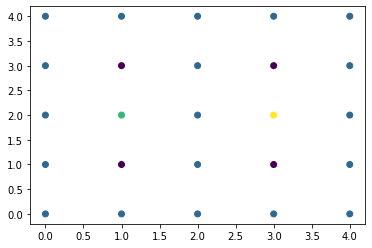

In [48]:
import matplotlib.pyplot as plt

X,Y = np.meshgrid(np.arange(matrix.shape[1]), np.arange(matrix.shape[0]))
plt.scatter(X.flatten(), Y.flatten(), c=matrix.flatten())

plt.show()